# Bernoulli and Binomial Distribution

The Bernoulli experiment is a simple experiment in which there is a binary outcome; 0 or 1, success or failure, heads ot tails etc\
This makes tossing a fair coin have a 0.5 chance of a heads or a tail.

The experiment can also describe events with different probability structures e.g chance of scoring a penanly is 80%.\
Where Y is a penalty outcome:\
$Y = Bernoulli(p)$ and $p=P(Y=1)=0.8$.\

The distribution is defined by 1 parameter, the parameter $p$, describing the chance of "success".

A general rule for the Bernoulli distribution is that:\
 $E(X)=p$ and $\sigma^2=p*(1-p)$.


## Binomial distribution

The binomial distribution describes the process of perfoming  n independent Bernoulli trials.\

Applying this to our penalty goal example, this means that the assumption is that, when a soccer player misses a penalty and then tries again, the fact that he missed it the previous time does not affect his chances of making it now: the probability is still 80% ($p=0.8$)!\

As we have a repeated Bernoulli experiment, the binomial distribution has two parameters:  𝑝
  (the success probability) and  𝑛
  (the number of times the experiment is repeated). We say that random variable  𝑌
  follows a Binomial distribution:  𝑌=𝑏𝑖𝑛(𝑛,𝑝)
 .

#### Using Numpy to randomly generate Binomial and bernoulli trials

Applied to our example, imagine that 1 represents scoring a penalty goal and 0 represents missing. If $p = 0.8$, if you take 100 penalty shots in a row, you'd expect to score about 80 goals.

In [1]:
import numpy as np
np.random.seed(123) # set a seed to get the same results
#For 100 penalty shots, theres an expected score of 80 goals
np.random.binomial(100, 0.8)# Generates a result close to 80%

78

Looping through the example 500 times and dividing by the number of iterations should yield close to 80

In [2]:
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)
sum(np_it)/500

80.068

Let's keep track of how many times we observe 0 goals, 1 goal, 2 goals, and 3 goals and find the probabilities through simulation. Now, let's repeat our experiment 10000 times.

In [3]:
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)

np_it stores the total penalty goal outcomes (0 to 3) for each of the 10000 iterations. Now using np.unique() with the optional argument return_counts, you get the levels of the  𝑘
  as in your Binomial formula along with how often they occurred when running 10000 trials.

In [4]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3]
[  58  929 3946 5067]


#### Visualizing the results

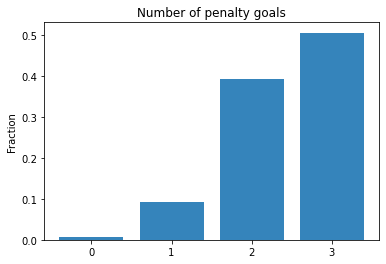

In [5]:
import matplotlib.pyplot as plt
plt.bar(values, counts/10000, align='center', alpha=0.9)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Number of penalty goals')
plt.show()

Let's now look at the values and compare them with the theoretical result. Recall that the theoretical result was:  {0.008,0.096,0.384,0.512}
 .

In [6]:
counts/10000

array([0.0058, 0.0929, 0.3946, 0.5067])

# LABS

# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [7]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [8]:
p_3_strikes = (factorial(10)/(factorial(7) * factorial(3))) * (0.25) ** 3 * (0.75) **7#answer = 0.2502822
p_3_strikes

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [9]:
def binom_distr(n,p,k):
    p_k = (factorial(n) / (factorial(k) * factorial(n-k))) * (p**k * (1-p) ** (n-k))
    return p_k

Validate your previous result by applying your new function.

In [10]:
# Your code here
check = binom_distr(10, 0.25, 3)
check

0.25028228759765625

Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [11]:
import numpy as np
# Your code here
prob = 0
for i in np.arange(5, 11):
    prob += binom_distr(10, 0.25, i)
prob

0.07812690734863281

## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [12]:
# leave the random seed here for reproducibility of results
np.random.seed(123)

n = 5000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(10, 0.25 ))
    np_it = np.array(iteration)
#
#
#
#

In [13]:
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

[0 1 2 3 4 5 6 7 8]
[ 310  941 1368 1286  707  297   78   11    2]


In [14]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

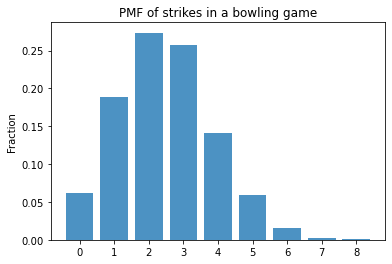

In [15]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(values, counts/5000, align='center', alpha=0.8)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('PMF of strikes in a bowling game');

You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

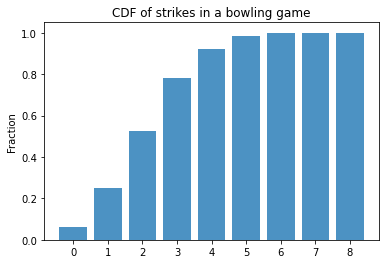

In [16]:
# Your code here
import matplotlib.pyplot as plt
plt.bar(values, np.cumsum(counts/5000), align='center', alpha=0.8)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('CDF of strikes in a bowling game');

## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.